## Universidad de Buenos Aires
## Visión por Computadora I

### Alumno: Eduardo Echeverria

## Trabajo Práctico 1 - Parte 1

### Algoritmo de Pasaje a Coordenadas Cromaticas

#### 1. Implementar el algoritmo de pasaje a Coordenadas Cromaticas para librarnos de las variaciones de contraste

In [1]:
# importamos la librerias necesarias
# %matplotlib qt
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Realizamos la carga de las imágenes en un array de forma que sea mas fácil iterar sobre ellas
original_cc_images = ['CoordCrom_1.png', 'CoordCrom_2.png', 'CoordCrom_3.png']
cc_images_to_process = []

# Leemos las imágenes
for file in original_cc_images:
    cc_images_to_process.append(cv.imread(f'./coord_cromaticas/{file}'))


In [3]:
# Implementación del algoritmo de coordenadas cromáticas

def coord_cromaticas(image):
    """
    Función que implementa el algoritmo de coordenadas cromáticas.
        Input: Array de NumPy que representa la imágen
        Output: Array de NumPy correspondiente a la imágen procesada
    """

    # Separamos la imagen en los tres canales correspondientes a R, G y B
    R, G, B = cv.split(image.astype(float))

    # Calculamos la suma de los valores de R, G y B para cada pixel
    sum_rgb = R + G + B

    # Para evitar la division entre 0, reemplazamos por 1 los valores cuya suma de los componentes R, G, B dio cero
    sum_rgb[sum_rgb == 0] = 1

    # Calculamos el algoritmo de coordenandas cromáticas
    channel_R = R / sum_rgb
    channel_G = G / sum_rgb
    channel_B = B / sum_rgb

    # Finalmente se agrupan los canales de vuelta
    cc_image = np.stack([channel_R, channel_G, channel_B], axis=-1)

    return cc_image

In [4]:
# Aplicamos el algoritmo de pasaje a Coordenadas Cromaticas a las imagenes
cc_processed_images = []

for image in cc_images_to_process:
    cc_processed_images.append(coord_cromaticas(image))

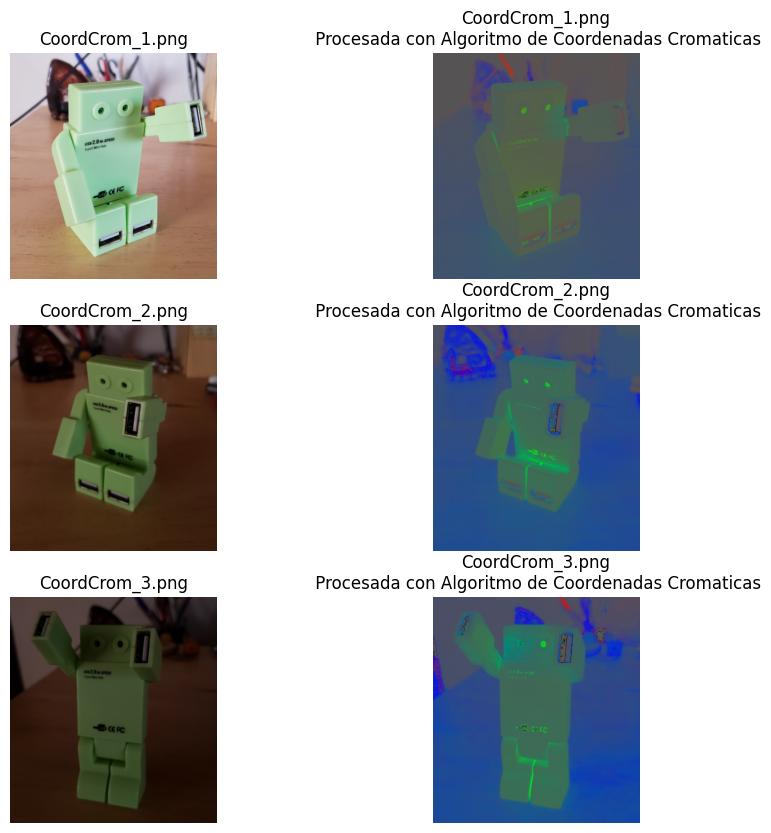

In [5]:
# Graficamos las imagenes test originales y las procesadas con el algoritmo de Coordenadas Cromaticas
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for index in range(3):
    ax[index, 0].imshow(cv.cvtColor(cc_images_to_process[index].astype(np.uint8), cv.COLOR_BGR2RGB))
    ax[index, 0].set_title(f"{original_cc_images[index]}")
    ax[index, 0].axis("off")

    ax[index, 1].imshow(cc_processed_images[index])
    ax[index, 1].set_title(f"{original_cc_images[index]}\n Procesada con Algoritmo de Coordenadas Cromaticas")
    ax[index, 1].axis("off")


### Algoritmo White Patch

#### 2. Implementar algoritmo White-Patch para librarnos de las diferencias de color de iluminacion

#### Imágenes "Test"

In [6]:
# Realizamos la lectura de las imagenes "Test". Nuevamente las agrupamos en un array para faliclitar la iteración sobre las imágenes.
original_test_images = ['test_blue.png', 'test_green.png', 'test_red.png']
test_images_to_process = []

for file in original_test_images:
    test_images_to_process.append(cv.imread(f'./white_patch/{file}'))

In [8]:
# Implementación del algoritmo de White-Patch

def white_patch_algorithm(image):
    """
    Función que implementa el algoritmo de White-Patch.
        Input: Array de NumPy que representa la imágen
        Output: Array de NumPy con valores en formato UINT8 correspondiente a la imágen procesada.
    """
    # Definimos un percentil
    percent = 95

    image = image.astype(np.float32)

    # Se calcula el valor máximo para cada pixel por cada canal R, G, B
    image_max = np.max(image, axis=(0,1))

    # Se determina si los valores máximos calculados arriba se acercan a 255, en cada canal. Se utilizan valores de tolerancia por defecto.
    if np.allclose(image_max, [255.0, 255.0, 255.0]):
        # Si los valores máximos se acercan a 255 en cada canal, se calcula el percentil de la intensidad de cada pixel para cada canal
        image_max[0] = np.percentile(image[:,:,0], percent)
        image_max[1] = np.percentile(image[:,:,1], percent)
        image_max[2] = np.percentile(image[:,:,2], percent)

    # Se normaliza al color de la luz blanca pura
    norm_image = image * (255.0 / image_max)

    # Nos aseguramos de no exceder el valor maximo de 255
    processed_image = np.minimum(norm_image, 255.0)

    return processed_image.astype(np.uint8)

In [9]:
# Aplicamos el algoritmo White-Patch a las imagenes test
test_processed_images = []

for image in test_images_to_process:
    test_processed_images.append(white_patch_algorithm(image))

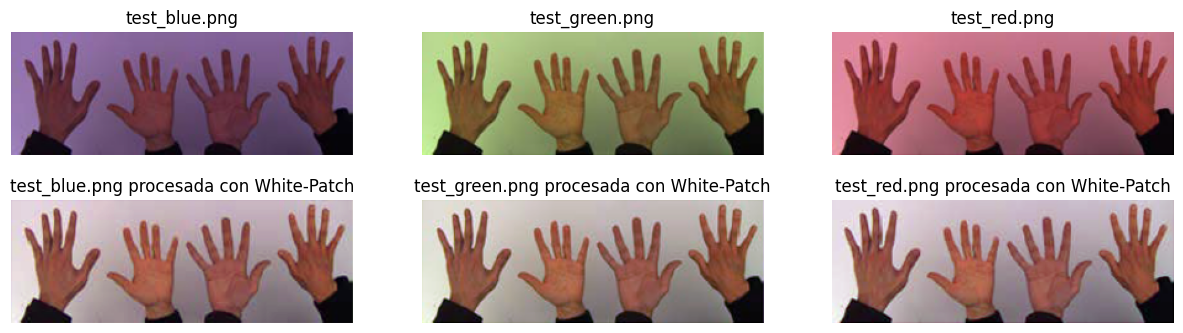

In [10]:
# Graficamos las imagenes test originales y las procesadas con White-Patch
fig, ax = plt.subplots(2, 3, figsize=(15, 4))

for index in range(3):
    ax[0, index].imshow(cv.cvtColor(test_images_to_process[index].astype(np.uint8), cv.COLOR_BGR2RGB))
    ax[0, index].set_title(f"{original_test_images[index]}")
    ax[0, index].axis("off")

    ax[1, index].imshow(test_processed_images[index][:, :, ::-1].astype(np.uint8))
    ax[1, index].set_title(f"{original_test_images[index]} procesada con White-Patch")
    ax[1, index].axis("off")

plt.show()

#### Imágenes "WP"

In [11]:
# Realizamos la lectura de las imagenes WP
original_wp_images = ['wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']
wp_images_to_process = []

for file in original_wp_images:
    wp_images_to_process.append(cv.imread(f'./white_patch/{file}'))

In [12]:
# Aplicamos el algoritmo White-Patch a las imagenes WP
wp_processed_images = []

for image in wp_images_to_process:
    wp_processed_images.append(white_patch_algorithm(image))

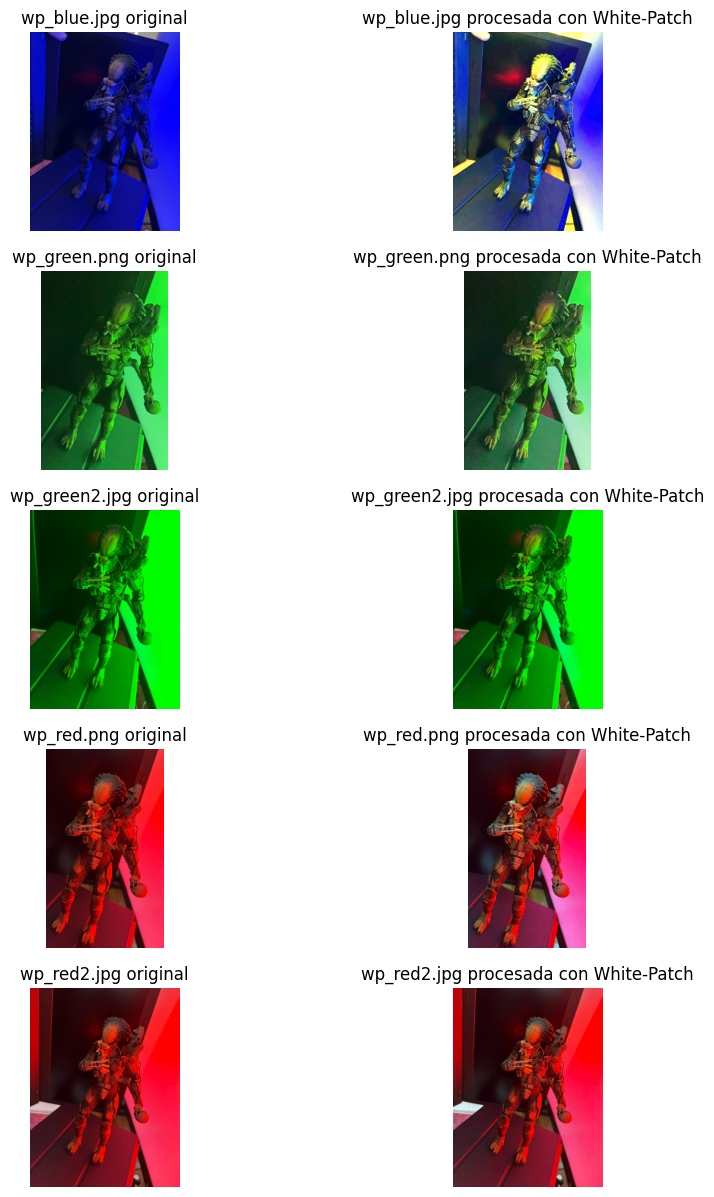

In [13]:
# Graficamos las imagenes WP originales y las procesadas con White-Patch
fig_wp, ax_wp = plt.subplots(5, 2, figsize=(10, 15))

for index in range(5):
    ax_wp[index, 0].imshow(cv.cvtColor(wp_images_to_process[index].astype(np.uint8), cv.COLOR_BGR2RGB))
    ax_wp[index, 0].set_title(f"{original_wp_images[index]} original")
    ax_wp[index, 0].axis("off")

    ax_wp[index, 1].imshow(wp_processed_images[index][:, :, ::-1].astype(np.uint8))
    ax_wp[index, 1].set_title(f"{original_wp_images[index]} procesada con White-Patch")
    ax_wp[index, 1].axis("off")

plt.show()

### 3) Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White - Patch

Se pudo observar que, en particular para las imágenes con la etiqueta "WP", la luz de color introduce un alto nivel de saturación que origina píxeles con valores muy altos (cercanos a 255) en los canales correspondientes al color de la luz. Al ser estos valore máximos muy cercanos a 255 se observa uno de los problemas conocidos del algoritmo White Patch que es que al dividir el 255 entre el valor máximo del píxel (parte de la ecuación del algoritmo) y al ser este valor máximo muy cercano a 255 el resultado es muy cercano a 1, lo cual al multiplicar por el array del canal retorna básicamente la misma imagen, sin variaciones o con variaciones imperceptibles para ese canal.

Esto se puede ver en el siguiente experimento que implementa la forma más básica del algoritmo white patch (sin percentiles):

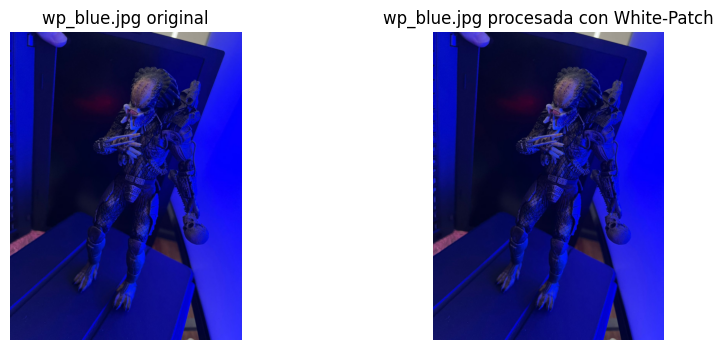

In [14]:
# Algoritmo White-Patch sin percentiles

def white_patch_no_percentil(image):
    image = image.astype(np.float32)
    image_max = np.max(image, axis=(0,1))
    norm_image = image * (255.0 / image_max)
    processed_image = np.minimum(norm_image, 255.0)

    return processed_image.astype(np.uint8)

image_original = cv.imread(f'./white_patch/wp_blue.jpg')
output = white_patch_no_percentil(image_original)

fig = plt.figure(figsize=(10, 4))

ax_wpa = plt.subplot(121)
ax_wpa.imshow(cv.cvtColor(image_original.astype(np.uint8), cv.COLOR_BGR2RGB))
ax_wpa.set_title(f"wp_blue.jpg original")
ax_wpa.axis("off")

ax_wpa = plt.subplot(122)
ax_wpa.imshow(output[:, :, ::-1].astype(np.uint8))
ax_wpa.set_title(f"wp_blue.jpg procesada con White-Patch")
ax_wpa.axis("off")

plt.show()

Los valores máximos de los píxeles del canal azul son muy cercanos a 255, lo cual al aplicarse el algoritmo White Patch ocasiona que la imagen procesada se vea casi igual a la imagen sin procesar. 

Para poder resolver este problema, es necesario introducir un valor de percentil al cálculo. Para las pruebas realizadas se utilizó el percentil 95 de forma de estar mas cerca del valor máximo del píxel. Introduciendo el percentil al algoritmo se obtienen una imágen donde los colores se recuperan de mejor forma, en particular para las imágenes de las manos y para las imagenes "WP" de color azul.

Otra posible falla que se puede presentar, especialmente cuando se utilizan percentiles es que puede darse que la division de 255 entre el producto del valor máximo del píxel y el percentil, devuelva un valor mayor a 1, lo cual al multiplicarse por el array del canal puede generar valores mayores a 255 para algunos píxeles. Esto ocasiona que al momento de convertirse de vuelta al formato UINT8 estos píxeles queden truncados a 0 lo cual genera imágenes raras y con efectos adversos. Esto se puede ver en el siguiente experimento:

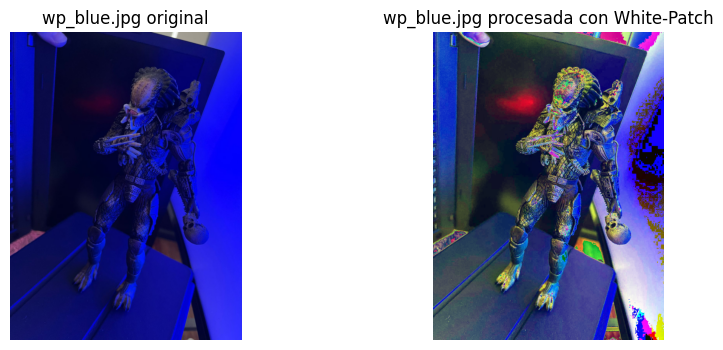

In [15]:

def white_patch_overflow(image):
    percent = 95
    image = image.astype(np.float32)
    image_max = np.max(image, axis=(0,1))

    if np.allclose(image_max, [255.0, 255.0, 255.0]):
        image_max[0] = np.percentile(image[:,:,0], percent)
        image_max[1] = np.percentile(image[:,:,1], percent)
        image_max[2] = np.percentile(image[:,:,2], percent)

    norm_image = image * (255.0 / image_max)

    return norm_image.astype(np.uint8)

image_original = cv.imread(f'./white_patch/wp_blue.jpg')
output = white_patch_overflow(image_original)

fig = plt.figure(figsize=(10, 4))

ax_wpa = plt.subplot(121)
ax_wpa.imshow(cv.cvtColor(image_original.astype(np.uint8), cv.COLOR_BGR2RGB))
ax_wpa.set_title(f"wp_blue.jpg original")
ax_wpa.axis("off")

ax_wpa = plt.subplot(122)
ax_wpa.imshow(output[:, :, ::-1].astype(np.uint8))
ax_wpa.set_title(f"wp_blue.jpg procesada con White-Patch")
ax_wpa.axis("off")

plt.show()

   Para evitar este problema, una solucion es introducir la validación siguiente:
   
   processed_image = np.minimum(norm_image, 255.0)

   De forma que en caso de que el valor del píxel sea mayor a 255 se retorne simplemente el valor máximo de 255.
